In [2]:
import numpy as np
import pandas as pd

from pathlib import Path
from matplotlib import pyplot as plt
from matplotlib.dates import DayLocator, DateFormatter
import matplotlib.dates as mdates

# import matplotlib.dates as mdates
dateFmt = DateFormatter('%b')

VOLUME_FILE = "res/surface_velocities/volumes_processed.parquet"
TEMPERATURE_FILE = "res/surface_velocities/temperature_processed.parquet"
SURF_VEL_FILE = "res/surface_velocities/TS_punto-fronte.txt"
# SURF_VEL_FILE = "res/surface_velocities/TS_punto-corpo.txt"

icepy_dir = Path.cwd().parents[1]

# Read dataframes
vol_df = pd.read_parquet(icepy_dir / VOLUME_FILE)
temp_df = pd.read_parquet(icepy_dir / TEMPERATURE_FILE)
surfvel_df = pd.read_csv(icepy_dir / SURF_VEL_FILE)


#### Volume vs temperature


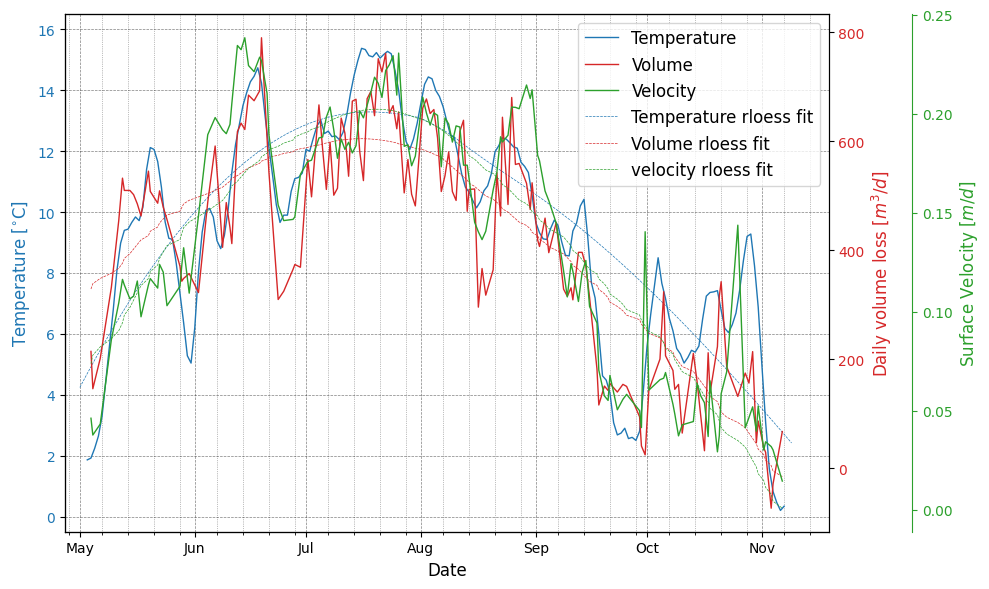

In [3]:
# Create host and parasite subplots
fig, host = plt.subplots(figsize=(10, 6))
par1 = host.twinx()
par2 = host.twinx()

# Plot temperature in host subplot
p1, = host.plot(temp_df["day_plot"], temp_df["Tavg_5d"], label="Temperature", linewidth=1, linestyle = 'solid', color="tab:blue")
p4, = host.plot(temp_df["day_plot"], temp_df["Tavg_5d_rloess"], label="Temperature rloess fit", linewidth=0.5, linestyle = 'dashed', color="tab:blue")
 
# Plot volume loss
p2, = par1.plot(vol_df["day_plot"], -vol_df["volume_daily_normalized"], label="Volume", linewidth=1, linestyle = 'solid', color="tab:red")
p5, =  par1.plot(vol_df["day_plot"], -vol_df["volume_daily_norm_rloess"], label="Volume rloess fit", linewidth=0.5, linestyle = 'dashed', color="tab:red")

# Plot surface velocity
p3, = par2.plot(vol_df["day_plot"], surfvel_df["V"], label="Velocity", linewidth=1, linestyle = 'solid',color="tab:green")
p6, = par2.plot(vol_df["day_plot"], surfvel_df["Vsmooth"], label="velocity rloess fit", linewidth=0.5, linestyle = 'dashed',color="tab:green")


# Set x and y labels
host.set_xlabel("Date", fontsize=12)
host.set_ylabel("Temperature [$^{\circ}$C]", fontsize=12, color="tab:blue")
par1.set_ylabel("Daily volume loss [$m^3/d$]", fontsize=12, color="tab:red")
par2.set_ylabel("Surface velocity [$m/d$]", fontsize=12, color="tab:green")

# Set x and y labels
host.set_xlabel("Date", fontsize=12)
host.set_ylabel("Temperature [$^{\circ}$C]", fontsize=12, color="tab:blue")
par1.set_ylabel("Daily volume loss [$m^3/d$]", fontsize=12, color="tab:red")
par2.set_ylabel("Surface Velocity [$m/d$]", fontsize=12, color="tab:green")

# Set x-axis date format
dateFmt = DateFormatter('%b')
host.xaxis.set_major_formatter(dateFmt)

# Set grid lines
host.grid(which="both", linestyle="--", alpha=0.5)
host.grid(which="major", axis="y", linewidth=0.5, color="black")
host.grid(which="major", axis="x", linewidth=0.5, color="black")
host.xaxis.set_minor_locator(DayLocator(bymonthday=[7, 14, 21, 28], interval=1, tz=None))
host.grid(which="minor", axis="y", linestyle=":", linewidth=0.5, color="black")
host.grid(which="minor", axis="x", linestyle=":", linewidth=0.5, color="black")

# Adjust the positioning and scale of the third y-axis
par2.spines["right"].set_position(("outward", 60))
par2.spines["right"].set_color("tab:green")
par2.yaxis.label.set_color("tab:green")
par2.tick_params(axis="y", colors="tab:green")
par2.spines["right"].set_visible(True)
par2.yaxis.label.set_visible(True)

# Update the legend to include the surface velocity plot
lines = [p1, p2, p3, p4, p5, p6]
labels = [line.get_label() for line in lines]
host.legend(lines, labels, loc="upper right", fontsize=12)

# Set colors
host.set_xlim([pd.to_datetime("2022-04-27"), pd.to_datetime("2022-11-19")])
host.set_ylim([-0.5, 16.5])
host.yaxis.label.set_color("tab:blue")
host.tick_params(axis="y", labelcolor="tab:blue")
par1.yaxis.label.set_color("tab:red")
par1.tick_params(axis="y", labelcolor="tab:red")
# par1.set_ylim([-50, 850])
par2.yaxis.label.set_color("tab:green")
par2.tick_params(axis="y", labelcolor="tab:green")
# par2.set_ylim([-0.0, 0.30])

plt.tight_layout()
fig.savefig(f"{Path(SURF_VEL_FILE).stem}.png", dpi=300)

In [4]:
# Export pandas dataframes to csv
df_out_dir = "res/surface_velocities"
df_out_dir = icepy_dir = Path.cwd().parents[1] / df_out_dir

vol_df.to_csv(df_out_dir / f"volumes_processed.csv", index=False)
temp_df.to_csv(df_out_dir / f"temperature_processed.csv", index=False)
surfvel_df.to_csv(df_out_dir / f"surface_velocities_processed.csv", index=False)

In [5]:
x = vol_df["volume_daily_normalized"] - vol_df["volume_daily_norm_rloess"]
y = surfvel_df["V"] - surfvel_df["Vsmooth"] 

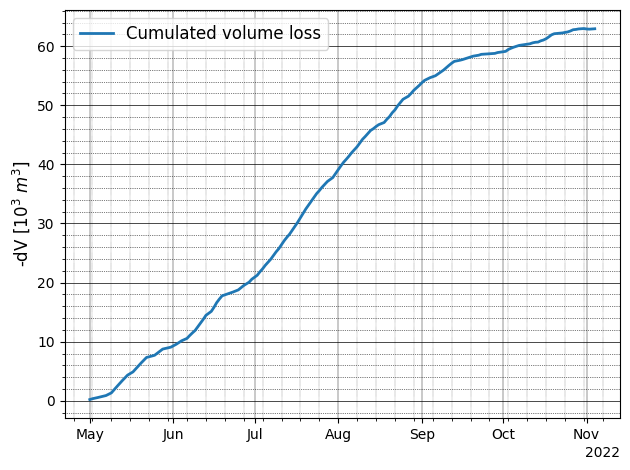

In [6]:
# Make plot for Cumulated volumes
import matplotlib.ticker as mticker

TSTEP = 5
major_locator = mdates.MonthLocator(interval=1)
major_formatter = mdates.ConciseDateFormatter(major_locator)
minor_locator =  mdates.WeekdayLocator(byweekday=0, interval=1)

fig, ax = plt.subplots()
fig.set_tight_layout(True)
p1 = ax.plot(vol_df["date_in"], -vol_df["volume_daily_norm_cumul"], label="Cumulated volume loss", linewidth=2, color="tab:blue")
ax.grid(True)
ax.minorticks_on()
ax.grid(which="major", axis="y", linewidth=0.5, color="black")
ax.grid(which="major", axis="x", linewidth=0.3, color="black")
ax.grid(which="minor", axis="y", linestyle=":", linewidth=0.5, color="black")
ax.grid(which="minor", axis="x", linestyle=":", linewidth=0.3, color="black")
ax.xaxis.set_major_locator(major_locator)
ax.xaxis.set_major_formatter(major_formatter)
ax.xaxis.set_minor_locator(minor_locator)
# ax.set_yticklabels(ax.get_yticks(), rotation = 90)

# Set y-axis ticker formatter to show multiples of 10^3 m³
def yaxis_formatter(x, pos):
    return f"{x/1000:.0f}"

ax.yaxis.set_major_formatter(mticker.FuncFormatter(yaxis_formatter))
ax.set_ylabel("-dV [$10^{3}$ $m^3$]", fontsize=12)


# Set legend
lines = p1
labels = [line.get_label() for line in lines]
ax.legend(lines, labels, loc="upper left", fontsize=12)
plt.tight_layout()

icepy_dir = Path.cwd().parents[1]
fig.savefig( icepy_dir / f"res/fig_for_paper/delta_volumi_stereo_cumlated.png", dpi=300)

plt.show()



In [7]:
vol_df["volume_daily_norm_cumul"].min()

-62978.80177238529

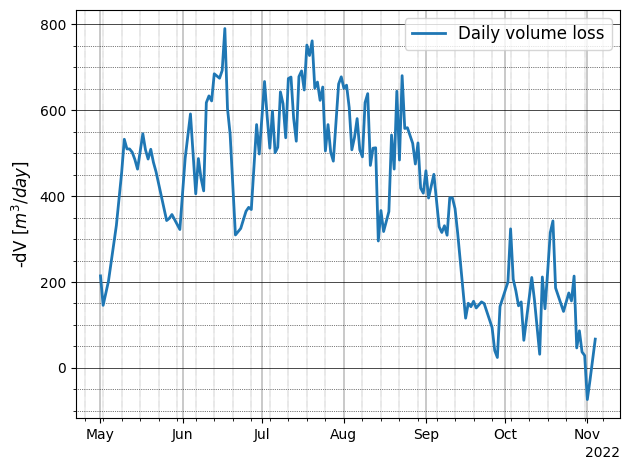

In [8]:
# Make plot for daily volumes loss
fig, ax = plt.subplots()
fig.set_tight_layout(True)
p1 = ax.plot(vol_df["date_in"], -vol_df["volume_daily_normalized"], label="Daily volume loss", linewidth=2, color="tab:blue")
ax.set_ylabel("-dV [$m^3/day$]", fontsize=12)
ax.grid(True)
ax.minorticks_on()
ax.grid(which="major", axis="y", linewidth=0.5, color="black")
ax.grid(which="major", axis="x", linewidth=0.3, color="black")
ax.grid(which="minor", axis="y", linestyle=":", linewidth=0.5, color="black")
ax.grid(which="minor", axis="x", linestyle=":", linewidth=0.3, color="black")
ax.xaxis.set_major_locator(major_locator)
ax.xaxis.set_major_formatter(major_formatter)
ax.xaxis.set_minor_locator(minor_locator)

# Set legend
lines = p1
labels = [line.get_label() for line in lines]
ax.legend(lines, labels, loc="upper right", fontsize=12)
plt.tight_layout()

icepy_dir = Path.cwd().parents[1]
fig.savefig( icepy_dir / f"res/fig_for_paper/delta_volumi_stereo_daily.png", dpi=300)
plt.show()



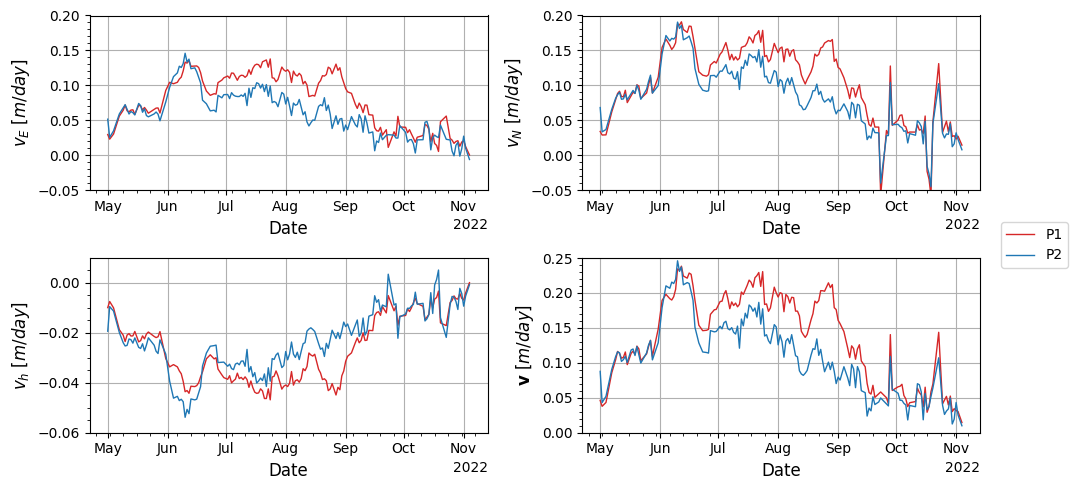

In [9]:
# Plot surface velocities components
SURF_VEL_P1_FILE = "res/surface_velocities/TS_punto-fronte.txt"
SURF_VEL_P2_FILE = "res/surface_velocities/TS_punto-corpo.txt"

icepy_dir = Path.cwd().parents[1]

# Read dataframes
vol_df = pd.read_parquet(icepy_dir / VOLUME_FILE)
temp_df = pd.read_parquet(icepy_dir / TEMPERATURE_FILE)
p1_vel = pd.read_csv(icepy_dir / SURF_VEL_P1_FILE)
p2_vel = pd.read_csv(icepy_dir / SURF_VEL_P2_FILE)
p1_vel["t1"] = pd.to_datetime(p1_vel["t1"], format="%d-%b-%Y") 
p1_vel["t2"] = pd.to_datetime(p1_vel["t2"], format="%d-%b-%Y") 
p2_vel["t1"] = pd.to_datetime(p2_vel["t1"], format="%d-%b-%Y") 
p2_vel["t2"] = pd.to_datetime(p2_vel["t2"], format="%d-%b-%Y") 

# Define locators for grid and ticks
major_locator = mdates.MonthLocator(interval=1)
major_formatter = mdates.ConciseDateFormatter(major_locator)
minor_locator =  mdates.WeekdayLocator(byweekday=0, interval=1)

def set_ax_propr(ax, show_xlabel= True, ylabel = None, ylim=None, show_legend=False):
    if show_xlabel: 
        ax.set_xlabel("Date", fontsize=12)
    if ylabel is not None:
        ax.set_ylabel(ylabel, fontsize=12)
    if ylim is not None:
        ax.set_ylim(ylim)
    ax.grid(True)
    dateFmt = DateFormatter('%b')
    ax.xaxis.set_major_formatter(dateFmt)
    ax.xaxis.set_major_locator(DayLocator(interval=30))    
    ax.minorticks_on()
    # ax.grid(which="major", axis="y", linewidth=0.5, color="black")
    # ax.grid(which="major", axis="x", linewidth=0.3, color="black")
    # ax.grid(which="minor", axis="y", linestyle=":", linewidth=0.5, color="black")
    # ax.grid(which="minor", axis="x", linestyle=":", linewidth=0.3, color="black")
    ax.xaxis.set_major_locator(major_locator)
    ax.xaxis.set_major_formatter(major_formatter)
    ax.xaxis.set_minor_locator(minor_locator)
    if show_legend:
        ax.legend(fontsize=12)


fig, axes = plt.subplots(2,2, figsize=(10,5))
axes[0,0].plot(p1_vel["t1"], p1_vel["dx"], label="P1", linewidth=1, color="tab:red")
axes[0,0].plot(p2_vel["t1"], p2_vel["dx"], label="P2", linewidth=1, color="tab:blue")
set_ax_propr(axes[0,0], ylabel="$\mathit{v}_E$ [$m/day$]", ylim=(-0.05, 0.20))
axes[0,1].plot(p1_vel["t1"], p1_vel["dy"], label="P1", linewidth=1, color="tab:red")
axes[0,1].plot(p2_vel["t1"], p2_vel["dy"], label="P2", linewidth=1, color="tab:blue")
set_ax_propr(axes[0,1], ylabel="$\mathit{v}_N$ [$m/day$]", ylim=(-0.05, 0.20))
axes[1,0].plot(p1_vel["t1"], p1_vel["dz"], label="P1", linewidth=1, color="tab:red")
axes[1,0].plot(p2_vel["t1"], p2_vel["dz"], label="P2", linewidth=1, color="tab:blue")
set_ax_propr(axes[1,0], ylabel="$\mathit{v}_h$ [$m/day$]", ylim=(-0.06, 0.01))
axes[1,1].plot(p1_vel["t1"], p1_vel["V"], label="P1", linewidth=1, color="tab:red")
axes[1,1].plot(p2_vel["t1"], p2_vel["V"], label="P2", linewidth=1, color="tab:blue")
set_ax_propr(axes[1,1], ylabel="$\mathbf{v}$ [$m/day$]", ylim=(0.0, 0.25))

handles, labels = axes[0,0].get_legend_handles_labels()
fig.legend(handles, labels, loc='center right', bbox_to_anchor=(1.08, 0.5))
fig.set_tight_layout(True)


In [10]:
# Dummy tests
date_range = [
    pd.to_datetime("2022-05-01"),
    pd.to_datetime("2022-09-21")

]
p1_sum = p1_vel.loc[(p1_vel["t1"] >= date_range[0]) & (p1_vel["t1"] <= date_range[1])]
p1_fall = p1_vel.loc[(p1_vel["t1"] > date_range[1])]

In [11]:
p1_fall.mean()

t1         2022-10-14 05:38:49.411764736
t2         2022-10-19 03:31:45.882352896
dx                              0.027259
dy                              0.034036
dz                             -0.008942
V                               0.053658
Vsmooth                         0.054649
dtype: object

In [12]:
p1_sum.mean()

t1         2022-07-14 18:33:16.638655488
t2         2022-07-19 15:43:51.932773120
dx                               0.09701
dy                              0.127188
dz                              -0.03238
V                               0.163299
Vsmooth                         0.161822
dtype: object

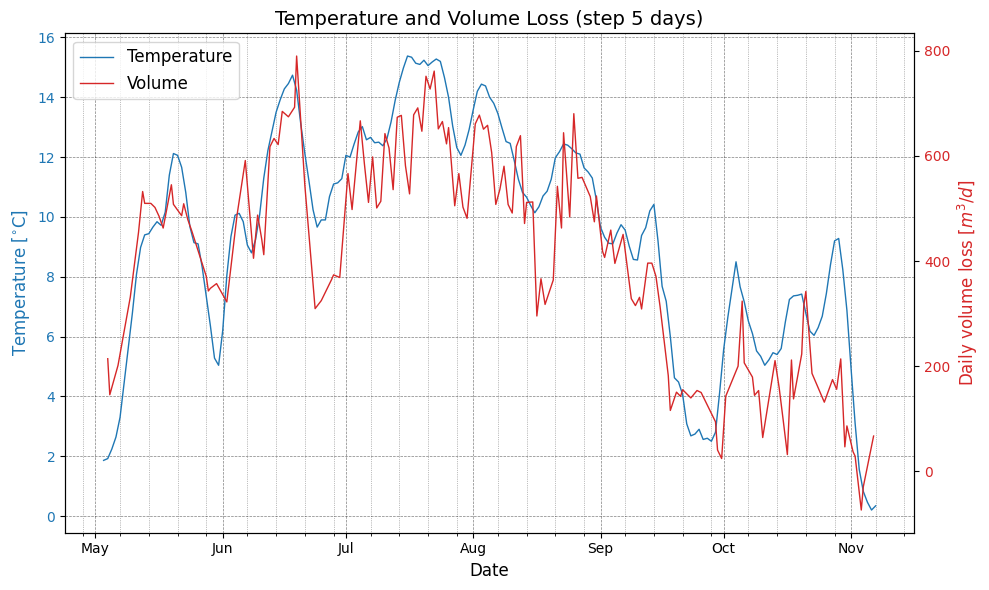

In [8]:
# Plot only volume-temperatures

# Create host and parasite subplots
fig, host = plt.subplots(figsize=(10, 6))
par = host.twinx()

# Create temperature and volume plots
p1, = host.plot(temp_df["day_plot"], temp_df["Tavg_5d"], label="Temperature", linewidth=1, color="tab:blue")
p2, = par.plot(vol_df["day_plot"], -vol_df["volume_daily_normalized"], label="Volume", linewidth=1, color="tab:red")

# Set x and y labels
host.set_xlabel("Date", fontsize=12)
host.set_ylabel("Temperature [$^{\circ}$C]", fontsize=12, color="tab:blue")
par.set_ylabel("Daily volume loss [$m^3/d$]", fontsize=12, color="tab:red")

# Set x-axis date format
dateFmt = DateFormatter('%b')
host.xaxis.set_major_formatter(dateFmt)

# Set grid lines
host.grid(which="both", linestyle="--", alpha=0.5)
host.grid(which="major", axis="y", linewidth=0.5, color="black")
host.grid(which="major", axis="x", linewidth=0.5, color="black")
host.xaxis.set_minor_locator(DayLocator(bymonthday=[7, 14, 21, 28], interval=1, tz=None))
host.grid(which="minor", axis="y", linestyle=":", linewidth=0.5, color="black")
host.grid(which="minor", axis="x", linestyle=":", linewidth=0.5, color="black")

# Set legend
lines = [p1, p2]
labels = [line.get_label() for line in lines]
host.legend(lines, labels, loc="upper left", fontsize=12)

# Set colors
host.tick_params(axis="y", labelcolor="tab:blue")
par.tick_params(axis="y", labelcolor="tab:red")
host.yaxis.label.set_color("tab:blue")
par.yaxis.label.set_color("tab:red")

# Set title
plt.title(f"Temperature and Volume Loss (step {TSTEP} days)", fontsize=14)
plt.tight_layout()

plt.show()


In [ ]:
# OLD Test for rolling average
# volumes["day_plot"] = volumes["date_in"] + np.timedelta64(5, "D") 
# volumes["day_plot"] = volumes["date_in"]
# temp["day_plot"] = temp["data"]
# temp["Tmed_5d"] = temp["Tmed"] .rolling(5, min_periods=1, center=False).mean()


# Trying to manaully compute rolling average on the same time window as the volume (differs from a regular rolling average with fixed time window is almost negligible)

# merged = pd.merge(temp, volumes, left_on="data", right_on="date_in", how="left")
# merged = merged[["data", "Tmed", "date_in", "date_fin"]]

# merged['rol_avg'] = np.nan
# for i in range(len(merged["date_in"])):
#     if pd.isna(merged["date_in"][i]):
#         continue    
#     d_in = merged["date_in"][i]
#     d_fin = merged["date_fin"][i]
#     mask = (merged['data'] >= d_in) & (merged['data'] < d_fin)
#     avg = merged['Tmed'][mask].mean()
#     merged['rol_avg'][i]  = avg
 
# T_roll_avg = merged[["date_in", "date_fin", "rol_avg"]][merged["date_in"].notnull()]